**Detecting Cyber-bullying in text**

import essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


import dataset for cyber-bullying

In [3]:
from google.colab import files
files.upload()

Saving cyber_cleandata (1).csv to cyber_cleandata (1).csv


{'cyber_cleandata (1).csv': b'label,untokenized_text,preprocessed_text\r\n0,As a woman you t complain about cleaning up your house as a man you should always take the trash out,"[\'woman\', \'t\', \'complain\', \'cleaning\', \'house\', \'man\', \'always\', \'take\', \'trash\']"\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n0,said no pussy inside my doghouse,"[\'said\', \'pussy\', \'inside\', \'doghouse\']"\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n,,\r\n0,Addicted t hi woof woof hot lad,"[\'addicted\', \'t\', \'hi\', \'woof\', \'woof\', \'hot\', \'lad\']"\r\n,,\r\n,,\r\n0,t woof woof and hot soles,"[\'t\', \'woof\', \'woof\', \'hot\', \'sol\']"\r\n0,eat a do these One,"[\'eat\', \'one\']"\r\n,,\r\n,,\r\n0,Why the

In [95]:
data=pd.read_csv('cyber_cleandata (1).csv')
data=data.dropna()
data['label']=data.label.map({1:'Offensive',0:'Non-offensive'}) # encoding output
data.head()

label  ...                                  preprocessed_text
0   Non-offensive  ...  ['woman', 't', 'complain', 'cleaning', 'house'...
40  Non-offensive  ...            ['said', 'pussy', 'inside', 'doghouse']
63  Non-offensive  ...  ['addicted', 't', 'hi', 'woof', 'woof', 'hot',...
66  Non-offensive  ...                ['t', 'woof', 'woof', 'hot', 'sol']
67  Non-offensive  ...                                     ['eat', 'one']

[5 rows x 3 columns]

analyzing target values

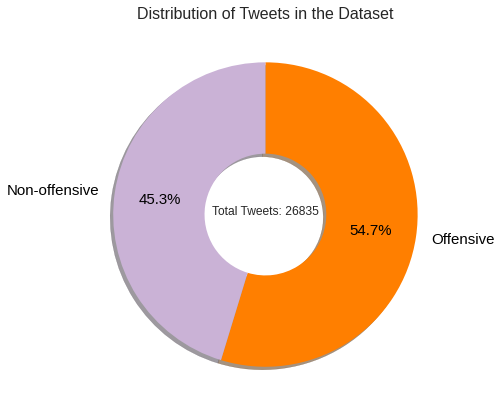

In [91]:
plt.figure(figsize = (7,7))
sorted_counts = data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(data.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [92]:
# data['label']=data.label.map({1:'Offensive',0:'Non-offensive'}) # encoding output
data['label'].value_counts()

Offensive        14683
Non-offensive    12152
Name: label, dtype: int64

Now its time for text preprocessing.
In order to deal with text we have to install NLTK library and their dependencies

In [ ]:
!pip install nltk

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
# print(stopwords.words('english'))
!pip install -q wordcloud
import wordcloud
# import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))


nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [96]:
'''
def clean_sentences(df):
    reviews = []

    for sent in (df['full_text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        # removing names in corpus
        vocab = set(nltk.corpus.words.words())
        vocab_text=" ".join(w for w in nltk.wordpunct_tokenize(review_text) if w.lower() in vocab )
    
        #tokenize the sentences
        # words = word_tokenize(review_text.lower())
        
        # stops = set(stopwords.words("english"))                  
    # 
        # 5. Remove stop words
        # meaningful_words = [w for w in words if not w in stops]
    
        #lemmatize each word to its lemma
        # lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
        reviews.append(vocab_text)

    return(reviews)
data['untokenized_text']=clean_sentences(data)
data.head()'''

'\ndef clean_sentences(df):\n    reviews = []\n\n    for sent in (df[\'full_text\']):\n        \n        #remove html content\n        review_text = BeautifulSoup(sent).get_text()\n        \n        #remove non-alphabetic characters\n        review_text = re.sub("[^a-zA-Z]"," ", review_text)\n        # removing names in corpus\n        vocab = set(nltk.corpus.words.words())\n        vocab_text=" ".join(w for w in nltk.wordpunct_tokenize(review_text) if w.lower() in vocab )\n    \n        #tokenize the sentences\n        # words = word_tokenize(review_text.lower())\n        \n        # stops = set(stopwords.words("english"))                  \n    # \n        # 5. Remove stop words\n        # meaningful_words = [w for w in words if not w in stops]\n    \n        #lemmatize each word to its lemma\n        # lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]\n    \n        reviews.append(vocab_text)\n\n    return(reviews)\ndata[\'untokenized_text\']=clean_sentences(data)\nd

In [ ]:
def clean_sentences(df):
    reviews = []

    for sent in (df['preprocessed_text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        # removing names in corpus
        # vocab = set(nltk.corpus.words.words())
        # vocab_text=" ".join(w for w in nltk.wordpunct_tokenize(review_text) if w.lower() in vocab )
    
        #tokenize the sentences
        # words = word_tokenize(sent.lower())
        
        # stops = set(stopwords.words("english"))  
        # stops = set(STOPWORDS)                
    # 
        # 5. Remove stop words
        # meaningful_words = [w for w in words if not w in stops]
    
        #lemmatize each word to its lemma
        # lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
        reviews.append(review_text)

    return(reviews)
data['preprocessed_text']=clean_sentences(data)

In [102]:
offensive=data[data['label']=='Offensive']
nonoffensive=data[data['label']=='Non-offensive']
from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title ):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(offensive['preprocessed_text'],'offensive')
show_wordcloud(nonoffensive['preprocessed_text'],'Non offensive')

In [100]:
data.head()

label  ...                                  preprocessed_text
0   Non-offensive  ...    woman    t    complain    cleaning    house ...
40  Non-offensive  ...              said    pussy    inside    doghouse  
63  Non-offensive  ...    addicted    t    hi    woof    woof    hot  ...
66  Non-offensive  ...                  t    woof    woof    hot    sol  
67  Non-offensive  ...                                       eat    one  

[5 rows x 3 columns]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['preprocessed_text'],data['label'],stratify=data['label'],random_state=42,test_size=0.3)
X_train.shape

(18784,)

In [47]:
X_test.shape

(8051,)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(X_train)
# tfidf=TfidfTransformer()
# X_train_tfidf=tfidf.fit_transform(X_train_counts)
X_test_counts=count_vect.transform(X_test)

# X_test_tfidf=tfidf.transform(X_test_counts)
# test=pd.DataFrame(X_test_counts.toarray())
# train=pd.DataFrame(X_train_counts.toarray())


In [49]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB(alpha = 0.1)
clf=naive.fit(X_train_counts,y_train)
naive_score=naive.score(X_test_counts,y_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=300)
rf.fit(X_train_counts,y_train)
rf_score=rf.score(X_test_counts,y_test)

In [53]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train_counts,y_train)
svm_score=svm.score(X_test_counts,y_test)


In [55]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train_counts,y_train)
lr_score=lr.score(X_test_counts,y_test)

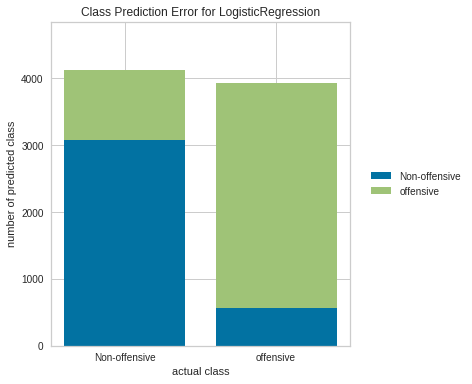

In [56]:
visualizer = ClassPredictionError(
    lr, classes=['Non-offensive','offensive'])
visualizer.fit(X_train_counts,y_train)

# Evaluate the model on the test data
visualizer.score(X_test_counts,y_test)

# Draw visualization
g = visualizer.poof()

In [57]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_counts,y_train)
xgb_score=xgb.score(X_test_counts,y_test)

In [58]:
visual_data=pd.DataFrame({'Algorithms':['Naive-Bayes','SVM','Logistic Regression','Random forest','Xgboost'],'Accuracy':[naive_score,svm_score,lr_score,rf_score,xgb_score]})
visual_data.head()


Algorithms  Accuracy
0          Naive-Bayes  0.791330
1                  SVM  0.789219
2  Logistic Regression  0.800149
3        Random forest  0.587008
4              Xgboost  0.755186

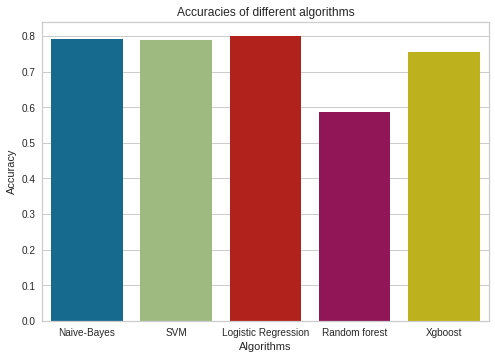

In [59]:
# sns.set_theme(style="whitegrid")
ax=ax = sns.barplot(x="Algorithms", y="Accuracy", data=visual_data)
plt.figure(1,figsize=(12,8))
plt.title('Accuracies of different algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

Now its time for predicting on unseen data and taking our best algorithm logistic regression.

In [88]:
text='im mad at you bitch' # enter your text for testing
# get the prediction for the text
text_=count_vect.transform([text])
pred=lr.predict(text_) # predicting 
prob=np.amax(lr.predict_proba(text_))#  getting probability
print(pred,prob)

['Offensive'] 0.9951340848415849
